In [60]:
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 9999
pd.options.display.max_columns = 100

def smape(A, F):
    return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

def show_ts(ts, forecast=None, title="Title", sampling="Samplingrate"):
    ax = ts.plot(label = "Observed", figsize=(10,3))
    if not (forecast is None):
        forecast.plot(ax=ax, label='Forecast')
        plt.legend()

    ax.set_xlabel('Date')
    ax.set_ylabel('Messages/'+sampling)
    plt.title(title)
    plt.show()

In [ ]:
# Load data into memory
dataset_names = ["avazu","IoT","wiki_de","wiki_en","horton","retailrocket","taxi","alibaba","google"]
sampling_rate = ["1h","15min","5min"]

datasets = {}  # {dataset_name: {sampling_rate: df}}

for dataset_name in dataset_names:
    datasets[dataset_name] = {}
    for sampling_rate in sampling_rates:
        results_statistical = pd.read_csv(f"results/{dataset_name}_{sampling_rate}_results.csv", index_col=0, parse_dates=True)
        results_gru = pd.read_csv(f"dl_experiments/results/{dataset_name}_{sampling_rate}_cuda:0_results.csv", index_col=0, parse_dates=True)["GRU"]
        
        df = pd.concat([results_statistical, results_gru], axis=1)
        df.name = f"{dataset_name}_{sampling_rate}"
        datasets[dataset_name][sampling_rate] = df
datasets

In [42]:
# Print SMAPE
for dataset_name, x in datasets.items():
    print(dataset_name)
    for sampling_rate, df in x.items():
        print("\t"+sampling_rate)
        models = df.columns[1:]
        for model in models:
            print(f"\t\t{model}: {smape(df.t,df[model]):.2f}")
            model_smape[m] = smape(df.t,df[model])

avazu
	1h
		LASTOBSERVED: 7.06
		LASTDAY: 5.23
		SimpleExpSmoothing: 7.07
		ExpSmoothing: 4.70
		ARIMA: 7.06
		SARIMA: 4.33
		Prophet: 3.64
		GRU: 10.34
	15min
		LASTOBSERVED: 2.21
		LASTDAY: 5.07
		SimpleExpSmoothing: 2.22
		ExpSmoothing: 2.70
		ARIMA: 2.04
		SARIMA: 2.98
		Prophet: 3.35
		GRU: 6.95
	5min
		LASTOBSERVED: 2.23
		LASTDAY: 5.43
		SimpleExpSmoothing: 1.97
		ExpSmoothing: 2.04
		ARIMA: 1.95
		SARIMA: 3.16
		Prophet: 3.51
		GRU: 4.12
IoT
	1h
		LASTOBSERVED: 8.42
		LASTDAY: 2.88
		SimpleExpSmoothing: 8.43
		ExpSmoothing: 4.43
		ARIMA: 7.06
		SARIMA: 3.62
		Prophet: 5.51
		GRU: 8.24
	15min
		LASTOBSERVED: 2.54
		LASTDAY: 2.92
		SimpleExpSmoothing: 2.54
		ExpSmoothing: 2.28
		ARIMA: 1.65
		SARIMA: 1.40
		Prophet: 5.28
		GRU: 4.19
	5min
		LASTOBSERVED: 0.42
		LASTDAY: 2.93
		SimpleExpSmoothing: 0.43
		ExpSmoothing: 0.30
		ARIMA: 0.14
		SARIMA: 1.56
		Prophet: 5.05
		GRU: 1.24
wiki_de
	1h
		LASTOBSERVED: 12.28
		LASTDAY: 2.56
		SimpleExpSmoothing: 12.28
		ExpSmoothing: 2.77
		AR

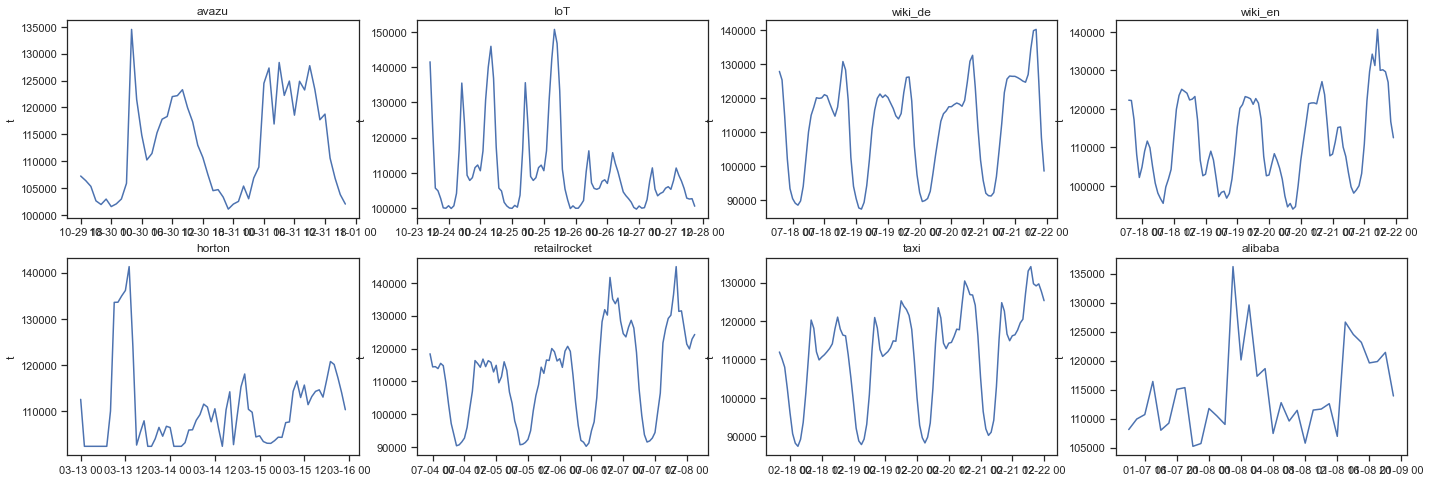

In [39]:
f, axs = plt.subplots(ncols=4, nrows=2, figsize=(24,8))
axs = [ax for axs_col in axs for ax in axs_col]
#f.tight_layout(pad=0)
sns.set_theme(style='ticks')

for (dataset_name, x), ax in zip(datasets.items(), axs):
    df = x["1h"]
    sns.lineplot(data=df.t, ax=ax)
    
    ax.title.set_text(dataset_name)
    ax.set(xlabel="")
    
    #ax.set_xlim(0, 1440 * 7)
    
    #ax.axvline(1440*5, color="k")

    #for idx, _ in x.groupby("time").mean().sort_values(df.name)[:steps].iterrows():
    #    ax.axvspan(idx, idx+30, facecolor="0.5", alpha=0.5, lw=0)
    
    #ticks = range(0, 7*24*60+1, 24*60)
    #ax.set_xticks(ticks)
    #ax.set_xticks(range(0, 7*24*60+1, 6*60), minor=True)
    #ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"])

#ax.set(xlabel="Days of the Week")
#f.text(-0.075, 0.5, "Carbon intensity (gCO2/kWh)", ha="center", va="center", rotation="vertical")

#plt.savefig("week.png", dpi=300, bbox_inches='tight')

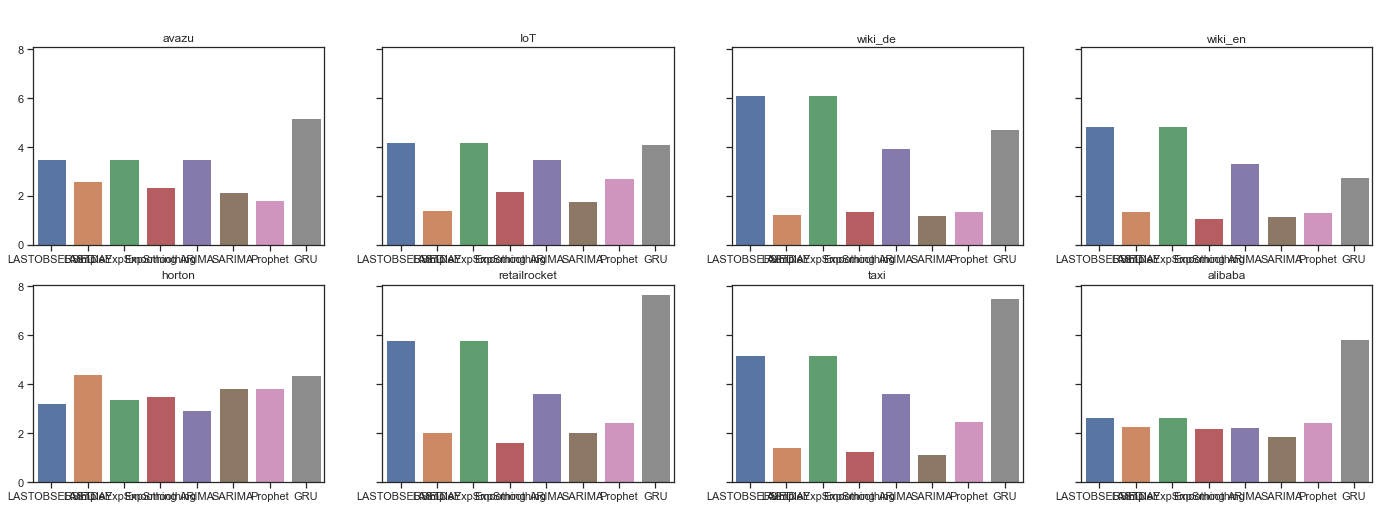

In [68]:
f, axs = plt.subplots(ncols=4, nrows=2, sharey=True, figsize=(24,8))
axs = [ax for axs_col in axs for ax in axs_col]
#f.tight_layout(pad=0)
sns.set_theme(style='ticks')
            
for (dataset_name, x), ax in zip(datasets.items(), axs):
    df = x["15min"]
    
    model_smape = {}
    for model in df.columns[1:]:
        model_smape[model] = smape(df.t,df[model])
    model_smape = pd.DataFrame([model_smape])
    #print(model_smape)
    
    sns.barplot(data=model_smape, ax=ax)
    ax.title.set_text(dataset_name)
    ax.set(xlabel="")
            
    #model_smape.plot(ax=ax)
    
    #ax.title.set_text(dataset_name)
    #ax.set(xlabel="")
    
    #ax.set_xlim(0, 1440 * 7)
    
    #ax.axvline(1440*5, color="k")

    #for idx, _ in x.groupby("time").mean().sort_values(df.name)[:steps].iterrows():
    #    ax.axvspan(idx, idx+30, facecolor="0.5", alpha=0.5, lw=0)
    
    #ticks = range(0, 7*24*60+1, 24*60)
    #ax.set_xticks(ticks)
    #ax.set_xticks(range(0, 7*24*60+1, 6*60), minor=True)
    #ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"])

#ax.set(xlabel="Days of the Week")
#f.text(-0.075, 0.5, "Carbon intensity (gCO2/kWh)", ha="center", va="center", rotation="vertical")
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.11, 0.96), frameon=False, ncol=len(labels))

#plt.savefig("week.png", dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='date'>

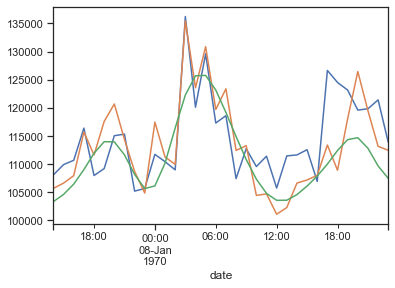

In [73]:
x = datasets["alibaba"]["1h"]

x.t.plot()
x.SARIMA.plot()
x.Prophet.plot()


In [184]:
durations = pd.read_csv("results/durations.csv")
# remove invalid Prophet models
durations.loc[durations["sampling_rate"] == "15min", "Prophet"] = np.nan
durations.loc[durations["sampling_rate"] == "5min", "Prophet"] = np.nan
durations.loc[durations["sampling_rate"] == "15min", "Prophet_tune"] = np.nan
durations.loc[durations["sampling_rate"] == "5min", "Prophet_tune"] = np.nan

In [185]:
durations_gru = pd.read_csv("dl_experiments/results/durations.csv").drop(columns=["device"])
durations_cnn = durations_gru.copy().rename(columns={"GRU_train": "CNN_train", "GRU_pred": "CNN_pred"})
durations = pd.merge(durations, durations_gru, on=["dataset", "sampling_rate"])
durations = pd.merge(durations, durations_cnn, on=["dataset", "sampling_rate"])
durations

,dataset,sampling_rate,SARIMA_opt,SARIMA_tune,LASTOBSERVED,ARIMA_opt,ARIMA_tune,SimpleExpSmoothing,SimpleExpSmoothing_tune,ExpSmoothing,ExpSmoothing_tune,Prophet,Prophet_tune,GRU_pred,GRU_train,CNN_pred,CNN_train
0,avazu,1h,304.225096,1.162240,0.001118,1.162102,0.012148,0.005414,0.005989,0.037405,0.018584,0.689940,0.054385,0.000048,254.305654,0.000048,254.305654
1,avazu,15min,1288.256112,25.055953,0.000706,9.580455,0.076839,0.004212,0.007159,0.069858,0.042675,NaN,NaN,0.000036,756.250742,0.000036,756.250742
2,avazu,5min,NaN,NaN,0.000718,39.769271,0.291401,0.006685,0.010411,0.499798,0.130122,NaN,NaN,0.000033,2693.721823,0.000033,2693.721823
3,IoT,1h,235.632510,0.067819,0.000709,4.308953,0.029441,0.004894,0.006423,0.038814,0.021879,0.074572,0.067153,0.000041,573.051413,0.000041,573.051413
4,IoT,15min,2061.989176,8.137557,0.000734,15.696772,0.193426,0.005194,0.008519,0.079805,0.051092,NaN,NaN,0.000060,1899.077035,0.000060,1899.077035
5,IoT,5min,NaN,NaN,0.000753,35.072346,1.146911,0.009254,0.014450,0.619137,0.158560,NaN,NaN,0.000022,4107.071589,0.000022,4107.071589
6,wiki_de,1h,205.504381,0.061815,0.000715,4.625229,0.054853,0.004600,0.006422,0.038386,0.022059,0.124040,0.088371,0.000055,467.922258,0.000055,467.922258
7,wiki_de,15min,2907.406277,4.497017,0.000716,6.867576,0.094000,0.005208,0.008464,0.077690,0.050837,NaN,NaN,0.000065,1583.751865,0.000065,1583.751865
8,wiki_de,5min,NaN,NaN,0.000775,27.670827,0.228568,0.010075,0.014562,0.541803,0.437855,NaN,NaN,0.000039,4155.503005,0.000039,4155.503005
9,wiki_en,1h,310.602459,1.040674,0.000700,2.292106,0.037227,0.004454,0.006915,0.039346,0.022749,0.193899,0.086162,0.000082,553.367300,0.000082,553.367300


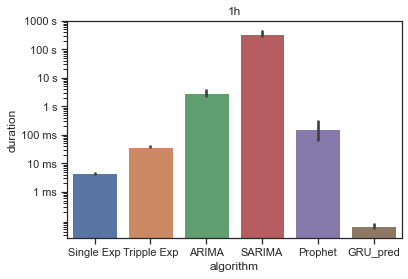

In [186]:
def barplot(durations, sampling_rate):
    d = durations[["dataset", "sampling_rate", "SimpleExpSmoothing", "ExpSmoothing", "ARIMA_opt", "SARIMA_opt", "Prophet", "GRU_pred"]]
    d = d.rename(columns={"SARIMA_opt": "SARIMA", "ARIMA_opt": "ARIMA", "SimpleExpSmoothing": "Single Exp", "ExpSmoothing": "Tripple Exp"})
    d = d[d["sampling_rate"] == sampling_rate].drop(columns=["sampling_rate"])
    d = pd.melt(d, id_vars=['dataset'], var_name="algorithm", value_name="duration")

    g = sns.barplot(data=d, x="algorithm", y="duration")
    g.set_yscale("log")
    ax = g.axes
    ax.set_yticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
    ax.set_yticklabels(["1 ms", "10 ms", "100 ms", "1 s", "10 s", "100 s", "1000 s"])
    
    ax.title.set_text(sampling_rate)

barplot(durations, "1h")

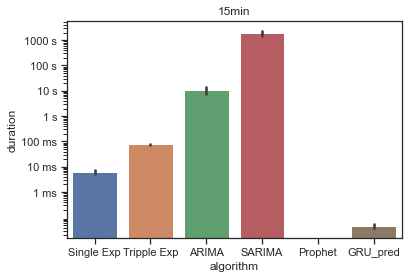

In [170]:
barplot(durations, "15min")

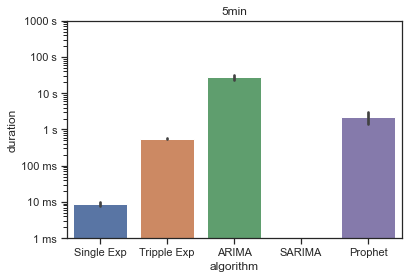

In [140]:
barplot(durations, "5min")

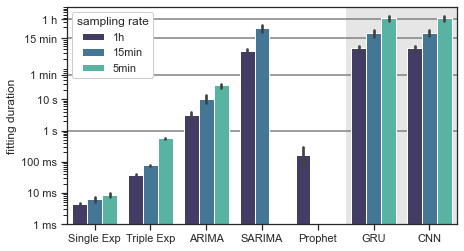

In [253]:
d = durations[["dataset", "sampling_rate", "SimpleExpSmoothing", "ExpSmoothing", "ARIMA_opt", "SARIMA_opt", "Prophet", "GRU_train", "CNN_train"]]
d = d.rename(columns={"SARIMA_opt": "SARIMA", "ARIMA_opt": "ARIMA", "SimpleExpSmoothing": "Single Exp", "ExpSmoothing": "Triple Exp", "GRU_train": "GRU", "CNN_train": "CNN"})
d = pd.melt(d, id_vars=["dataset", "sampling_rate"], var_name="algorithm", value_name="duration")

plt.figure(figsize=(7,4))
plt.axvspan(xmin=4.5, xmax=7, color=(.9, .9, .9), zorder=-1)
#plt.axvline(x=4.5, color=(.5, .5, .5), zorder=0)
plt.axhline(y=1, color=(.5, .5, .5), zorder=0)
plt.axhline(y=60, color=(.5, .5, .5), zorder=0)
plt.axhline(y=60*15, color=(.5, .5, .5), zorder=0)
plt.axhline(y=3600, color=(.5, .5, .5), zorder=0)

g = sns.barplot(data=d, x="algorithm", y="duration", hue="sampling_rate", palette="mako")
g.set_yscale("log")
ax = g.axes
ax.set_yticks([0.001, 0.01, 0.1, 1, 10, 60, 60*15, 3600])
ax.set_yticklabels(["1 ms", "10 ms", "100 ms", "1 s", "10 s", "1 min", "15 min", "1 h"])
ax.set_xlabel('')
ax.set_ylabel("fitting duration")
    
plt.legend(title="sampling rate", loc="upper left", framealpha=1)
plt.savefig("train_duration.png", dpi=300, bbox_inches='tight')

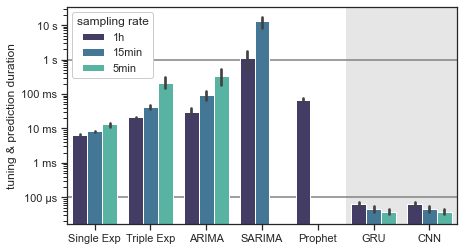

In [252]:
d = durations[["dataset", "sampling_rate", "SimpleExpSmoothing_tune", "ExpSmoothing_tune", "ARIMA_tune", "SARIMA_tune", "Prophet_tune", "GRU_pred", "CNN_pred"]]
d = d.rename(columns={"SARIMA_tune": "SARIMA", "ARIMA_tune": "ARIMA", "SimpleExpSmoothing_tune": "Single Exp", "ExpSmoothing_tune": "Triple Exp", "Prophet_tune": "Prophet", "GRU_pred": "GRU", "CNN_pred": "CNN"})
d = pd.melt(d, id_vars=["dataset", "sampling_rate"], var_name="algorithm", value_name="duration")

plt.figure(figsize=(7,4))
plt.axvspan(xmin=4.5, xmax=7, color=(.9, .9, .9), zorder=-1)
#plt.axvline(x=4.5, color=(.5, .5, .5), zorder=0)
plt.axhline(y=1, color=(.5, .5, .5), zorder=0)
plt.axhline(y=0.0001, color=(.5, .5, .5), zorder=0)

g = sns.barplot(data=d, x="algorithm", y="duration", hue="sampling_rate", palette="mako")
g.set_yscale("log")
ax = g.axes
ax.set_yticks([0.0001, 0.001, 0.01, 0.1, 1, 10])
ax.set_yticklabels(["100 µs", "1 ms", "10 ms", "100 ms", "1 s", "10 s"])
ax.set_xlabel('')
ax.set_ylabel("tuning & prediction duration")
    
plt.legend(title="sampling rate", loc="upper left", framealpha=1)
plt.savefig("pred_duration.png", dpi=300, bbox_inches='tight')

[Text(0, 0.001, '1 ms'),
 Text(0, 0.01, '10 ms'),
 Text(0, 0.1, '100 ms'),
 Text(0, 1.0, '1 s'),
 Text(0, 10.0, '10 s')]

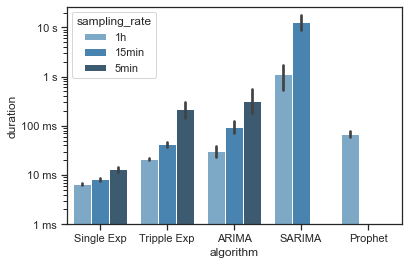

In [244]:
#sampling_rate = 

d = durations[["dataset", "sampling_rate", "SimpleExpSmoothing_tune", "ExpSmoothing_tune", "ARIMA_tune", "SARIMA_tune", "Prophet_tune"]]
d = d.rename(columns={"SARIMA_tune": "SARIMA", "ARIMA_tune": "ARIMA", "SimpleExpSmoothing_tune": "Single Exp", "ExpSmoothing_tune": "Tripple Exp", "Prophet_tune": "Prophet"})
#d = d[d["sampling_rate"] == sampling_rate].drop(columns=["sampling_rate"])
d = pd.melt(d, id_vars=["dataset", "sampling_rate"], var_name="algorithm", value_name="duration")

g = sns.barplot(data=d, x="algorithm", y="duration", hue="sampling_rate", palette="Blues_d")
g.set_yscale("log")
ax = g.axes
ax.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax.set_yticklabels(["1 ms", "10 ms", "100 ms", "1 s", "10 s"])

<AxesSubplot:xlabel='date'>

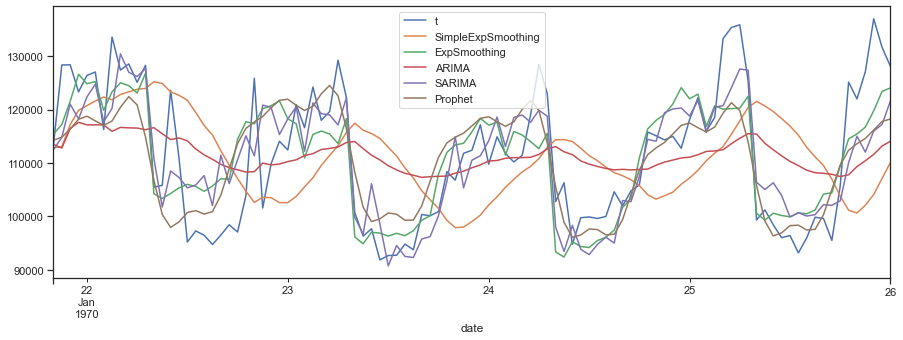

In [40]:
pd.read_csv("results/google_1h_results.csv", index_col=0, parse_dates=True).drop(columns=["LASTOBSERVED", "LASTDAY"]).plot(figsize=(15,5))